In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import sncosmo
from   astropy.table    import Table
from   astropy.io       import ascii

#from   analyzeSN import LightCurve
#import analyzeSN

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb

#### This file can be replaced with any of the opsim files

In [2]:
opsfilename = 'minion_1016_newsky.db'
opsdb       = db.OpsimDatabase(opsfilename)

simdata = opsdb.query_columns(opsdb.defaultTable, 
                              colnames=['fieldRA', 'fieldDec', 'filter', 'night', 'visitTime', 'airmass', 'filtSkyBrightness', 'expMJD', 'fiveSigmaDepth'], 
                              sqlconstraint=None)

### Putting OpSim columns in arrays to make it easier to work with

In [3]:
ra_array      = np.zeros(len(simdata))
dec_array     = np.zeros(len(simdata))
airmass_array = np.zeros(len(simdata))
time_array    = np.zeros(len(simdata))
sigmadepth    = np.zeros(len(simdata))

# creating empty array for strings for filter names
val           = [''] * len(simdata)
filter_array  = np.array(val)

for i in range(len(simdata)):
    ra_array[i]      = simdata[i][0] # right ascension
    dec_array[i]     = simdata[i][1] # declination
    filter_array[i]  = simdata[i][2] # filters
    time_array[i]    = simdata[i][7] # time should be expMJD
    airmass_array[i] = simdata[i][5] # airmass
    sigmadepth[i]    = simdata[i][8] # 5 sigma depth

### Sampled SN properties in an array
$m_B = 10.635 - \log_{10}(x0)$

In [ ]:
'''
zvals   = data.z.values
x0vals  = data.x0.values
x1vals  = data.x1.values
cvals   = data.c.values
mBvals  = data.mB.values
t0vals  = data.t0.values
smass   = data.totalMassStellar.values
ravals  = data.raJ2000_gal.values
decvals = data.decJ2000_gal.values

snids = data.index.values
'''

#### Setting the filename of sampled supernova parameters. 
This file is obtained by running SNTable notebook that Rahul has. It has (x0,x1,c,t0,z) and host galaxy information. t0 is the peak magnitude time of each supernova.

In [ ]:
'''
# this line should be here to be run with the following lines, otherwise it would be wrong! (snids would be from 
# this running line otherwise)

#filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table.csv"

filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table_cosmoDC2_test.csv"
#filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table_cosmoDC2.csv"

from pandas import read_csv

data  = read_csv(filename, nrows=10)#, delim_whitespace=True

data.set_index('snid', inplace=True)

snids = data.index.values

z_condition = 'z < 0.2'

zvals   = data.loc[snids].query(z_condition).z.values
x0vals  = data.loc[snids].query(z_condition).x0.values
x1vals  = data.loc[snids].query(z_condition).x1.values
cvals   = data.loc[snids].query(z_condition).c.values
mBvals  = data.loc[snids].query(z_condition).mB.values
t0vals  = data.loc[snids].query(z_condition).t0.values
smass   = data.loc[snids].query(z_condition).totalMassStellar.values
ravals  = data.loc[snids].query(z_condition).ra.values
decvals = data.loc[snids].query(z_condition).dec.values

snids = data.loc[snids].query(z_condition).index.values

#vaaaaal = data.query('z<0.03', inplace=False)
'''

In [ ]:
'''
filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table_cosmoDC2_z0.1.csv"

from pandas import read_csv

data  = read_csv(filename)#, delim_whitespace=True

temp_indx = np.unique(data['galaxy_id'])

new_indx_list = []

for i in range(len(temp_indx)):
    val_indx = np.where(data['galaxy_id'] == temp_indx[i])[0][0]
    new_indx_list.append(val_indx)
    
new_indx = np.array(new_indx_list)
'''

In [4]:
# this line should be here to be run with the following lines, otherwise it would be wrong! (snids would be from 
# this running line otherwise)

#filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table.csv"

#filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table_cosmoDC2_test_z0.2.csv"
filename = "/global/homes/a/anitab/DC2_run1p1_TransientDocs/Notebooks/Hosted_SN_table_cosmoDC2_z0.1.csv"

from pandas import read_csv

all_data  = read_csv(filename)#, delim_whitespace=True



temp_indx = np.unique(all_data['galaxy_id'])

new_indx_list = []

for i in range(len(temp_indx)):
    val_indx = np.where(all_data['galaxy_id'] == temp_indx[i])[0][0]
    new_indx_list.append(val_indx)
    
new_indx = np.array(new_indx_list)


data = all_data.iloc[new_indx]


data.set_index('snid', inplace=True)

snids = data.index.values
#ordered_indx = data.index.values

'''
zvals   = data['z']
x0vals  = data['x0']
x1vals  = data['x1']
cvals   = data['c']
mBvals  = data['mB']
t0vals  = data['t0']
smass   = data['totalMassStellar']
ravals  = data['ra']
decvals = data['dec']
'''


zvals   = data.loc[snids].z.values
x0vals  = data.loc[snids].x0.values
x1vals  = data.loc[snids].x1.values
cvals   = data.loc[snids].c.values
mBvals  = data.loc[snids].mB.values
t0vals  = data.loc[snids].t0.values
smass   = data.loc[snids].totalMassStellar.values
ravals  = data.loc[snids].ra.values
decvals = data.loc[snids].dec.values

snids   = data.loc[snids].index.values

In [5]:
zvals   = data.loc[snids].z.values

### Choosing rows of OpSim based on sampled SNe
You need the opsimsummary package before running the next cell which can be found here: https://github.com/rbiswas4/OpSimSummary

In [6]:
import os
import opsimsummary as oss
import healpy as hp
print(oss.__version__)

Some imports failed, which implies some dependencies are missing as described below
No module named 'mpl_toolkits.basemap'
Visulization functions based on maps will not work
1.16.1


In [7]:
from opsimsummary import SynOpSim

I need to make sure angleUnit has 'degrees' attribute

In [8]:
synopsim  = SynOpSim.fromOpSimDB(opsfilename, subset = 'wfd', opsimversion='lsstv3',
                                angleUnit='degrees', usePointingTree=True)

 reading from database sqlite:///minion_1016_newsky.db
SELECT * FROM Summary WHERE propID in (54)


### Generator
This is a Python generator function to make going through data faster. This goes through the observing file and uses Ra and Dec of sampled SNe to determine which SNe would be visible at which times.

In [9]:
gen = synopsim.pointingsEnclosing(ravals, decvals, circRadius=0., pointingRadius=1.75, usePointingTree=True)

### Time and filters from OpSim file
This is going through the generator and inserting times of observation and filer names in a list. After running this for loop, if we need to go through the generator again, we need to run the gen = ... line again because the generator has now gone all the way to the end. So, we need ro rerun this line:

gen = synopsim.pointingsEnclosing(ravals, decvals, circRadius=0., pointingRadius=1.75, usePointingTree=True)

In [10]:
timeopsim_list       = []
filteropsim_list     = []
sigmadepthopsim_list = []

for i, df in enumerate(gen):
    
    timeopsim = df['expMJD']
    timeopsim_list.append(timeopsim.values)
    
    filteropsim = df['filter']
    filteropsim_list.append(filteropsim.values)
    
    sigmadepthopsim = df['fiveSigmaDepth']
    sigmadepthopsim_list.append(sigmadepthopsim.values)
    
    #raopsim = df['fieldRA']
    #raopsim_list.append(raopsim.values)
    ###raopsim_list += raopsim.values.tolist() # this is to make the 2D array into 1D array. Not needed in general though

### Plotting SNe and their corresponding OpSim points
This shows supernovae as red dots and the OpSim visits as blue dots. There might be multiple visits at the same location so some points are overlapping and they are for different times.

In [ ]:
'''
ifx      = np.array([21,22,23,24,25]) # subplot numbers (for turning x ticks on/off)
ify      = np.array([1,6,11,16,21])   # subplot numbers (for turning y ticks on/off)

plt.figure(1, figsize=(15,15))

for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.plot(np.rad2deg(decopsim_list[1000*i]), np.rad2deg(raopsim_list[1000*i]), ".", color="blue")
    plt.plot(decvals[1000*i], ravals[1000*i], ".", color="red")
    plt.ylim(50,60)
    plt.xlim(-34,-24)
    plt.tick_params(axis='both', labelleft='off', labelbottom='off')

    if i+1 in ifx:
        plt.xlabel("Ra [deg]",fontsize=15)
        plt.tick_params(axis='x', labelbottom='on')
    if i+1 in ify:
        plt.ylabel("Dec [deg]",fontsize=15)
        plt.tick_params(axis='y', labelleft='on')
    
plt.suptitle("SNe in red with opsim visits in blue")
'''

### Checking time range of OpSim with $t_0$
Looping over all supernova and checking the observing times corresponding to supernova location from OpSim file and adding the ones that are within (t0 - 19 < OpSimtime < t0+49 ) range. This is the SALT model time range. If the OpSim time is not within this time range, the flux calculated would be 0 and we do not get any useful information. So, I want to reduce the number of data and only work with the useful data.

In [12]:
from lsst.sims.catUtils.supernovae import SNObject
from lsst.sims.photUtils.BandpassDict import BandpassDict

# Setting the LSST BandPass object to be used in BandFlux function
LSST_BandPass = BandpassDict.loadTotalBandpassesFromFiles()

mlist     = []
jlist_tot = []
snids_tot = []

for m in range(len(timeopsim_list)):
    jlist = []
    for j in range(len(timeopsim_list[m])):
        if (timeopsim_list[m][j] > t0vals[m] -19 and timeopsim_list[m][j] < t0vals[m] + 49):
            jlist.append(j)
    if jlist:
        mlist.append(m)
        jlist_tot.append(jlist)
        

In [13]:
NumSN_query = np.shape(mlist)

In [14]:
NumSN_query

(929,)

### Calculating the flux
Goes through a loop for each supernova and sets the parameters for each and then calculates the flux for all the visits

In [15]:
fluxlist_tot    = [] 
timelist_tot    = []
fluxerrlist_tot = []
filterlist_tot  = []

# Going through each SN
for SN_id, val in enumerate(mlist): #[:400]):
    # setting parameters for each supernova
    
    params   = {'x0': x0vals[val], 'x1': x1vals[val], 'c': cvals[val], 't0':t0vals[val], 'z':zvals[val]}
    snobject = SNObject(ravals[val], decvals[val])
    snobject.set(**params)
        
    # to make filternames what the code accepts using list comprehension to make it faster
    filters_modified = [LSST_BandPass[key] for key in filteropsim_list[val]]

    fluxlist    = []
    timelist    = []
    fluxerrlist = []
    filterlist  = []

    
    # going through all the visits for each single supernova
    for j in jlist_tot[SN_id]:
        # flux and fluxerr
        fluxval    = snobject.catsimBandFlux(bandpassobject = filters_modified[j], time = timeopsim_list[val][j])
        fluxvalerr = snobject.catsimBandFluxError(bandpassobject=filters_modified[j],
                                                  time=timeopsim_list[val][j],
                                                  m5=sigmadepthopsim_list[val][j])
        
        # Adding error to flux values by sampling from a Gaussian with mean of fluxval 
        # and sigma of fluxvalerr for each point 
        fluxval_new = np.random.normal(fluxval, fluxvalerr, 1)[0] # this [0] is to avoid destorying the shape of list
        fluxlist.append(fluxval_new)
        
        timelist.append(timeopsim_list[val][j]) # appending the times of observation to a list
        
        fluxerrlist.append(fluxvalerr)
        filterlist.append(filteropsim_list[val][j])
    
    fluxlist_tot.append(fluxlist)       # shape should be (number of SN, entries for each SN)
    timelist_tot.append(timelist)       # shape should be (number of SN, entries for each SN)
    fluxerrlist_tot.append(fluxerrlist) # shape should be (number of SN, entries for each SN)
    filterlist_tot.append(filterlist)   # shape should be (number of SN, entries for each SN)

### Plotting flux vs. time
This is the fluxes obtained using catsimBandFlux() function for a selection of SNe vs expMJD time. The points are fluxes in all bands so that is why they have funny and oscillating shapes.

In [ ]:
ifx      = np.array([21,22,23,24,25]) # subplot numbers (for turning x ticks on/off)
ify      = np.array([1,6,11,16, 21])

plt.figure(1, figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    
    indx = np.arange(0,len(timelist_tot[i]))
    Z = [x for _,x in sorted(zip(timelist_tot[i],indx))]
        
    plt.errorbar(np.sort(timelist_tot[i]), np.array(fluxlist_tot[i])[Z], yerr = np.array(fluxerrlist_tot[i])[Z], color='blue')

    if i+1 in ifx:
        plt.xlabel("Time [MJD]",fontsize=15)
    #    plt.tick_params(axis='x', labelbottom='on')
    if i+1 in ify:
        plt.ylabel("Flux",fontsize=15)
    #    plt.tick_params(axis='y', labelleft='on')

### sncosmo fitting
https://sncosmo.readthedocs.io/en/v1.6.x/photdata.html?highlight=Photometric%20Data

I want to make a table that has all the information to pass to sncosmo. It should be a table that includes:
(time, band, flux, fluxerr, zp, zpsys). 

The band should be in the form of 'lsstu', 'lsstg', ...

zp: 'ab'

### Creating a table to pass to sncosmo
This function creates a table that has (time, band, flux, fluxerr, zp, zpsys) values in a Table that can be passed to sncosmo fit_lc() function. The format of the bands should be correct as it is done here.

In [16]:
from astropy.table import Table, Column

dust             = sncosmo.CCM89Dust()
modelsncosmo     = sncosmo.Model(source = 'salt2-extended', effects=[dust], effect_names=['mw'],
                                 effect_frames=['obs']) # setting SN model including extinction

def create_Table(SnNum, timelist=timelist_tot):
    t            = Table()
    
    length       = len(timelist[SnNum])  # length of time and flux array for each SN
    zpsysarray   = np.array(['ab'] * length) # creating an array of zpsys

    t['time']    = timelist_tot[SnNum]       # setting time
    
    # This line is to make bands in a format readable for sncosmo
    t['band']    = np.array(['lsst' + np.array(filterlist_tot[SnNum])[i] for i in range(len(filterlist_tot[SnNum]))])
    t['flux']    = fluxlist_tot[SnNum]       # flux
    t['fluxerr'] = fluxerrlist_tot[SnNum]    # fluxerr
    t['zp']      = np.zeros(length)          # zp (all zp values are 0)
    t['zpsys']   = zpsysarray                # zpsys

    t['band']    = t['band'].astype(str)     # to make sure band has the correct format
    
    return t

In [15]:
'''
t  = create_Table(16)
snids[mlist[16]]

modelsncosmo.set(z=data.loc[snids[mlist[16]]].z)
modelsncosmo.set(t0=data.loc[snids[mlist[16]]].t0)
result, fitted_model  = sncosmo.fit_lc(np.sort(t), modelsncosmo, ['x0', 'x1', 'c'])

#lc = LightCurve(t.to_pandas().query('band != "sdssy"').sort_values(by='time'))
'''

In [18]:
fitted_model.param_names

['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']

In [ ]:
'''
params = Odict(data.loc[snids[mlist[16]]][['z', 'c', 'x1', 'x0', 't0']])

truth  = sncosmo.Model(source='salt2-extended')
truth.set(**params)

truth_salt = sncosmo.Model(source='salt2')
truth_salt.set(**params)

fig = sncosmo.plot_lc(np.sort(t), model=(fitted_model, truth), errors=result.errors, 
                    model_label=("fit", "truth"), pull=True, color='k')
'''

### $m_B$ and $\mu(z)$ functions

In [17]:
def mB_func(x0):
    return 10.635 - (2.5 * np.log10(x0))

def mu(x0, x1, c, smassval):
    
    alpha  = 0.141
    beta   = 3.101
    mB     = mB_func(x0)
    DeltaM = -0.07
    
    if smassval < 1e10:
        MB = -19.05
    else:
        MB = -19.05 + DeltaM
        
    val   = mB - (MB - (alpha * x1) + (beta * c))
    
    return val

### Error on $\mu(z)$

In [18]:
def sigma_mB(x0, sigma_x0):
    final_val = (((-2.5/np.log(10)) * (1./x0))**2) *  (sigma_x0**2)
    return np.sqrt(final_val)

def sigma_mu(sigma_mBval, sigma_x1, sigma_c):
    alpha     = 0.141
    beta      = 3.101
    val_err   = (sigma_mBval**2) + ((alpha**2) * (sigma_x1**2)) + ((beta**2) * (sigma_c**2)) 
    final_val = np.sqrt(val_err)
    return final_val

In [67]:
#data.loc[snids[mlist]].ra.values
#ravals[mlist]

numpy.ndarray

In [25]:
limit = 929

sigma_mu_vals  = np.zeros(len(mlist[0:limit]))
mu_vals        = np.zeros(len(mlist[0:limit]))
zvals_fitsn    = np.zeros(len(mlist[0:limit]))
zvals_fitfit   = np.zeros(len(mlist[0:limit]))
ztruevals      = np.zeros(len(mlist[0:limit])) 
x0val_err      = np.zeros(len(mlist[0:limit]))
x1val_err      = np.zeros(len(mlist[0:limit]))
cval_err       = np.zeros(len(mlist[0:limit]))
zval_err       = np.zeros(len(mlist[0:limit]))
chisqvals      = np.zeros(len(mlist[0:limit]))
likelihoodvals = np.zeros(len(mlist[0:limit]))

t0vals_fitsn   = np.zeros(len(mlist[0:limit]))
x0vals_fitsn   = np.zeros(len(mlist[0:limit]))
x1vals_fitsn   = np.zeros(len(mlist[0:limit]))
cvals_fitsn    = np.zeros(len(mlist[0:limit]))
 
for i, val in enumerate(mlist[0:limit]):    
    t  = create_Table(i)
    
    modelsncosmo.set(z=zvals[val])
    modelsncosmo.set(t0=t0vals[val])
    
    try:
        #result, fitted_model  = sncosmo.fit_lc(np.sort(t), modelsncosmo, ['z','x0', 'x1', 'c'], bounds={'z':(0.0, 0.2)})
        result, fitted_model  = sncosmo.fit_lc(np.sort(t), modelsncosmo, ['z','x0', 'x1', 'c'], 
                                               bounds={'z':(zvals[val] - 0.0005, zvals[val] + 0.0005)})
    except:
        print ("Got an exception error at ",i)
        continue
    
    mu_vals[i]       =  mu(fitted_model.parameters[2], fitted_model.parameters[3], fitted_model.parameters[4], 
                            data.loc[snids[mlist[i]]].totalMassStellar)
    sigma_mBval      = sigma_mB(fitted_model.parameters[2], result.errors['x0'])
    sigma_mu_vals[i] = sigma_mu(sigma_mBval,result.errors['x1'], result.errors['c'])
    
    zvals_fitsn[i]   = fitted_model.parameters[0]
    t0vals_fitsn[i]  = fitted_model.parameters[1]
    x0vals_fitsn[i]  = fitted_model.parameters[2]
    x1vals_fitsn[i]  = fitted_model.parameters[3]
    cvals_fitsn[i]   = fitted_model.parameters[4]
    
    ztruevals[i]    = zvals[mlist[i]]    
    zvals_fitfit[i] = snobject.SNstate['z']
    x0val_err[i]    = result.errors['x0']
    x1val_err[i]    = result.errors['x1']
    cval_err[i]     = result.errors['c']
    zval_err[i]     = result.errors['z']
    chisqvals[i]    = result.chisq
    N               = len(timelist_tot[0])
    likelihoodvals[i] = (1./(6 * N)) * np.exp(-result.chisq/2.) * 100

Got an exception error at  19
Got an exception error at  87
Got an exception error at  140


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/models.py:670: RuntimeWarning: overflow encountered in power
  self._model['clbase'](wave)**self._parameters[2])
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/models.py:136: RuntimeWarning: invalid value encountered in multiply
  fsum = np.sum(f * b.trans * b.wave * b.dwave, axis=1) / HC_ERG_AA
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.071281
       t0 = +61855.354207
       x0 = +58584583508.537476
   

Got an exception error at  177
Got an exception error at  189
Got an exception error at  204
Got an exception error at  210
Got an exception error at  217


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.091783
       t0 = +60368.094104
       x0 = -33338826.950103
       x1 = -130.146590
        c = -22457.818784
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  265
Got an exception error at  278


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.090081
       t0 = +61257.142868
       x0 = +177810960.343180
       x1 = +3113.368009
        c = +65198.489863
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  283


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.089638
       t0 = +60088.872390
       x0 = -1825534834.331132
       x1 = -35.707765
        c = -780312.762472
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  284


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.096208
       t0 = +62724.112908
       x0 = +281249400.641358
       x1 = +4654.442465
        c = +173515.989160
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  287
Got an exception error at  312
Got an exception error at  333


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.094813
       t0 = +60023.699837
       x0 = +4070864.997398
       x1 = +506.725982
        c = +179294.459154
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  341
Got an exception error at  350


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.090027
       t0 = +61932.827771
       x0 = +0.000463
       x1 = +8.343045
        c = +953.005363
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  380
Got an exception error at  395
Got an exception error at  397


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.096050
       t0 = +59899.398524
       x0 = +6464843337.209022
       x1 = +80937.470002
        c = -498961.816227
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  423
Got an exception error at  432


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.088183
       t0 = +60397.604811
       x0 = +33162262.936006
       x1 = +17.851062
        c = +32895.624757
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  453


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.082077
       t0 = +62942.835337
       x0 = -680189.090632
       x1 = -150.673993
        c = +384.855112
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  458
Got an exception error at  531


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.096392
       t0 = +60640.172689
       x0 = -95156233.108206
       x1 = -1077.133653
        c = -149419.297034
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  587


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.081329
       t0 = +61850.976149
       x0 = +43183685.860399
       x1 = +647.423108
        c = +15130.546786
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  621


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.104405
       t0 = +62343.063597
       x0 = -3688054851.162629
       x1 = -114750.602730
        c = -1546956.412380
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  645
Got an exception error at  660
Got an exception error at  673


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.136997
       t0 = +61366.972779
       x0 = +1041789415.732111
       x1 = +19768.623466
        c = +125820.211984
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  697


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.119193
       t0 = +60772.161791
       x0 = -8061312419.685728
       x1 = -7746.389293
        c = -3998361.607494
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  724
Got an exception error at  744
Got an exception error at  764


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.112469
       t0 = +60137.314998
       x0 = +1561787011.942536
       x1 = +5498.840623
        c = +92882.975273
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  789
Got an exception error at  803


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.104123
       t0 = +60061.201112
       x0 = -95664446.922490
       x1 = -1318.110953
        c = -40437.074909
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  808


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.103445
       t0 = +61652.798349
       x0 = +37425185.503917
       x1 = -1364.854478
        c = +46988.609329
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  882


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.128831
       t0 = +62829.570004
       x0 = -2065477783.658431
       x1 = -6747.314517
        c = -162142.737161
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  917


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sncosmo/12.0-1-g5e70e90+5/lib/python/sncosmo-1.3.0-py3.6-linux-x86_64.egg/sncosmo/fitting.py:428: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
        z = +0.131466
       t0 = +61486.799620
       x0 = +23417387.920640
       x1 = +13.024066
        c = +467.972004
    mwebv = +0.000000
    mwr_v = +3.100000

  d, l = m.migrad(ncall=maxcall)


Got an exception error at  923


In [ ]:
#plt.plot(likelihoodvals, zvals_fitsn, ".")

#### $\chi^2$ value calculations (generating table)

In [ ]:
from scipy.stats import chi2
#p  = np.array([0.99, 0.975, 0.95, 0.90])
p      = np.array([0.05])
df     = np.linspace(1,30).reshape(-1,1)
table1 = chi2.isf(p, df)

### Calculating $\mu$ for a subset of SNe

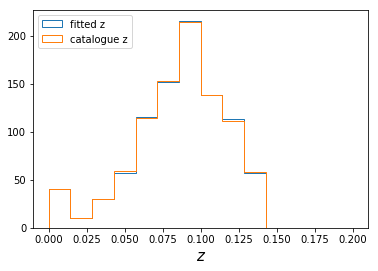

In [26]:
plt.hist(zvals_fitsn,       histtype='step', bins=np.linspace(0.,0.2,15), label='fitted z')
plt.hist(ztruevals,         histtype='step', bins=np.linspace(0.,0.2,15), label='catalogue z')
#plt.hist(z_reverse_vals_mod,histtype='step', bins=np.linspace(0.,0.2,15), label='$z(mu)$')
plt.legend(loc='upper left')
plt.xlabel("$z$", fontsize=15)
plt.savefig("zfit_zcat_hist_929SN.png")

In [23]:
indx = np.where(np.isnan(z_reverse_vals) == True)
z_reverse_vals_mod = np.delete(z_reverse_vals, indx)

np.where(np.isnan(z_reverse_vals_mod) == True)

NameError: name 'z_reverse_vals' is not defined

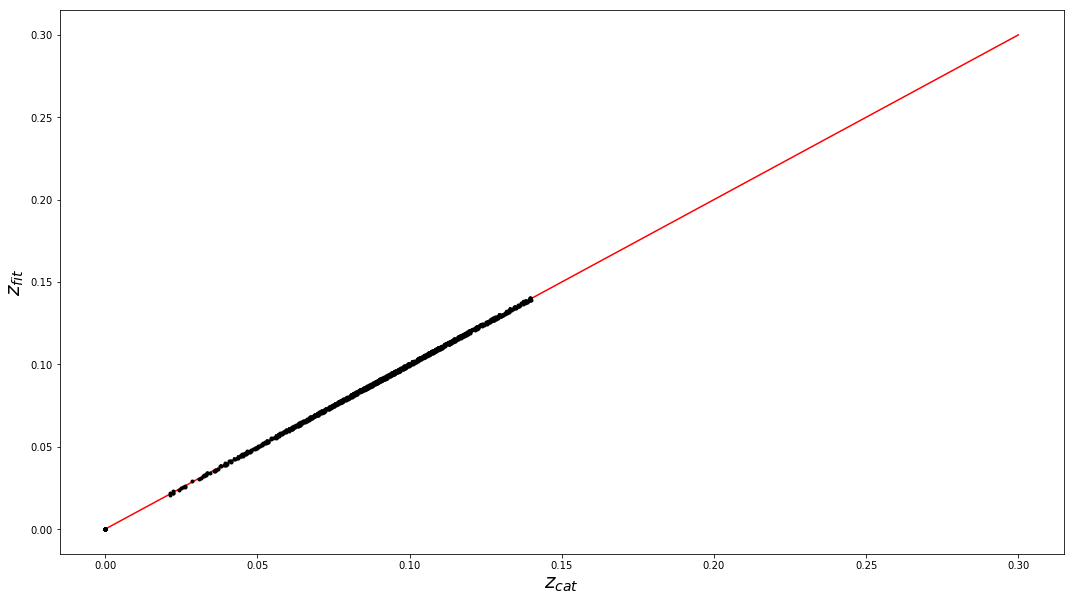

In [27]:
plt.figure(1, figsize = (18,10))
plt.errorbar(ztruevals, zvals_fitsn, yerr = zval_err, fmt="k.")
x = np.linspace(0,0.3, 50)
y = np.linspace(0,0.3, 50)
plt.plot(x,y, "red")
plt.xlabel("$z_{cat}$", fontsize=20)
plt.ylabel("$z_{fit}$", fontsize=20)
plt.savefig("zcat_zfit_error_929SN.png")

### Peculiar velocity

In [51]:
def vpec(zmu , zmeas):
    val  = ((zmu - zmeas)* 3e5) / (1+zmeas)
    return val

In [52]:
vpec_vals = vpec(zvals_fitsn, ztruevals)

In [30]:
print ("Mean = ",   np.mean(vpec_vals))
print ("Median = ", np.median(vpec_vals))
print ("Std = ",    np.std(vpec_vals))

Mean =  0.964256891697
Median =  0.0
Std =  120.058102743


#### Plot of peculiar velocity vs. fitted redshift

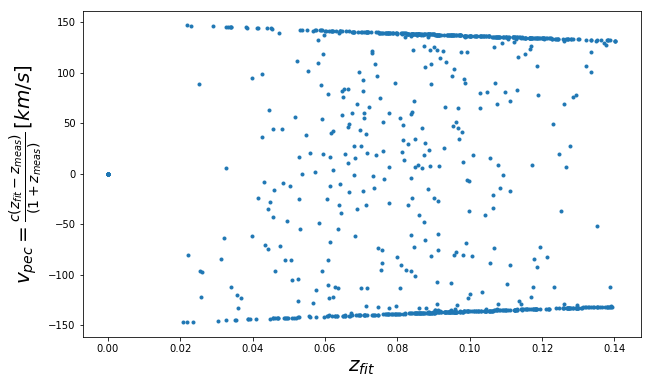

In [53]:
plt.figure(2, figsize=(10, 6))
plt.plot(zvals_fitsn , vpec_vals,".")
plt.xlabel("$z_{fit}$", fontsize=20)
plt.ylabel(r"$v_{pec} = \frac{c(z_{fit} - z_{meas})}{(1+z_{meas})} \, [km/s]$", fontsize=20)
plt.savefig("vpec_929SN.png")

#### Plot of distribution of peculiar velocity

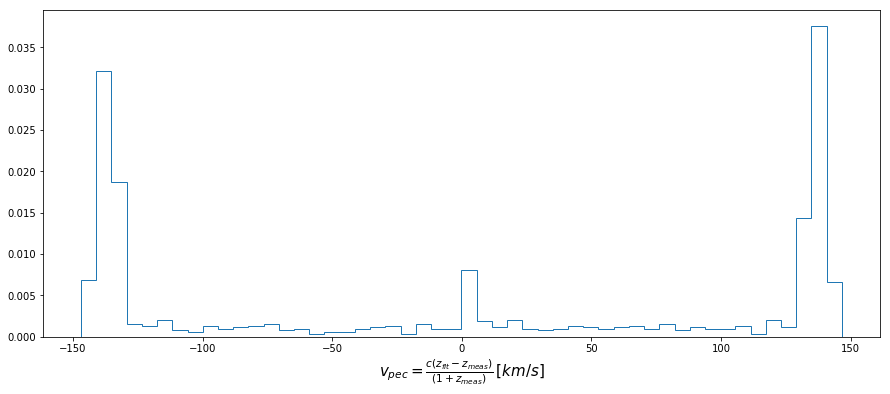

In [54]:
plt.figure(3, figsize=(15,6))
plt.hist(vpec_vals, bins=50,histtype="step", normed=True)
plt.xlabel(r"$v_{pec} = \frac{c(z_{fit} - z_{meas})}{(1+z_{meas})} \, [km/s]$", fontsize=15)
plt.savefig("vpec_hist_norm_929SN.png")

### Plotting distribution of $\mu$ obtained from SN fitting

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in log


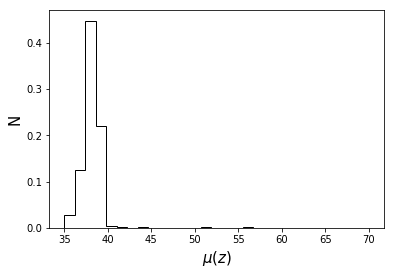

In [35]:
ztheory        = np.linspace(zvals_fitfit.min(), zvals_fitfit.max(),len(mlist))
mu_theory_vect = np.vectorize(mu_kosowsky)
mu_theory      = mu_theory_vect(ztheory)

plt.hist(mu_vals, bins = np.linspace(35,70,30), histtype = "step", color="black", normed="True")
plt.xlabel(r"$\mu (z)$", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.savefig("mu_hist_929SN.png")

### $\mu(z)$ from theory

In [34]:
from   scipy              import interpolate, integrate

h  = 0.6726
H0 = h*100.

def chi_integrand(zprime):
    '''
    Parameters
    -------------------------------------------------------------------------------------------------
        zprime: redshift values
        
    Return
    -------------------------------------------------------------------------------------------------
        Integrand of integral part in luminosity distance in Equation (3) in Kosowsky 2011.
        d(zprime)/ E(zprime)
    '''

    omegam = 0.316
    omegav = 0.684
    val    = 1./(np.sqrt(omegam*(1+zprime)**3 + omegav))
    return val

def chi_integral(z):
    '''
    Parameters
    -------------------------------------------------------------------------------------------------
        z: redshift
        
    Return
    -------------------------------------------------------------------------------------------------
        Integral of the integral in luminsoty distance in Equation (3) in Kosowsky 2011.
        d(zprime)/ E(zprime) integrated from 0 to z
    '''
    
    c       = 3e5 #km/s
    val,err = integrate.quad(chi_integrand,0,z)
    return val

def mu_kosowsky(z):
    '''
    Parameters
    -------------------------------------------------------------------------------------------------
        z: redshift
        
    Return
    -------------------------------------------------------------------------------------------------
        Distance modulus (mu) obtained from Equation (2) in Kosowsky
    '''
    
    c   = 3e5
    righthandside = (1+z) * (c/H0) * chi_integral(z)
    val = 2.17 * np.log(righthandside) + 25.
    return val

In [40]:
from   scipy              import interpolate, integrate

In [41]:
def reverse_mu(mu):
    zinterp        = np.linspace(0,2,100)
    mu_theory_vect = np.vectorize(mu_kosowsky)
    muinterp       = mu_theory_vect(zinterp)
    func           = interpolate.interp1d(muinterp, zinterp)
    return func(mu)

In [43]:
#z_reverse_vals = reverse_mu(mu_vals)

In [36]:
plt.figure(1, figsize = (10,6))
plt.errorbar(zvals_fitsn, z_reverse_vals, fmt="k.")
x = np.linspace(0,0.3, 50)
y = np.linspace(0,0.3, 50)
plt.plot(x,y, "red")
plt.xlabel("$z_{fit}$", fontsize=20)
plt.ylabel("$z_(\mu)$", fontsize=20)

NameError: name 'z_reverse_vals' is not defined

### Number of SN available
To find which SNe have larger number of times so that we have more points to fit for the fluxes in each band

In [ ]:
counters = 0
for i in range(len(mlist)):
    if np.shape(timelist_tot[i])[0] <10 :
        counters = counters+1
        print (i)
        
#print ("Total number of SN = ", np.shape(timelist_tot[16]))

In [73]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
from astropy import units as u

In [74]:
cosmo.comoving_distance(0.1) / u.Mpc

<Quantity 418.4508155899051>

In [75]:
comoving_r = cosmo.comoving_distance(zvals_fitsn) / u.Mpc

### saving to file for c++ code

In [80]:
data_Save = np.column_stack((ravals[mlist], decvals[mlist], zvals_fitsn, np.array(comoving_r), vpec_vals))

In [81]:
np.savetxt("DC2_test_z0.1_929SN_nolikelihood.dat", data_Save, fmt="%.9e")

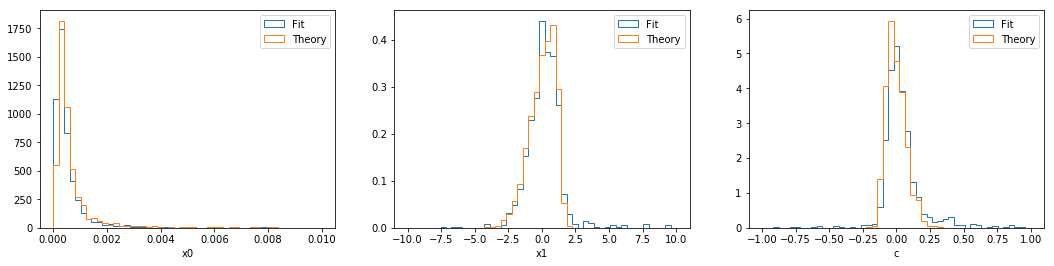

In [143]:
plt.figure(4, figsize=(18,4))
plt.subplot(131)
plt.hist(x0vals_fitsn, bins=np.linspace(0,1e-2,50), histtype= "step" , normed=True, label="Fit")
plt.hist(x0vals,       bins=np.linspace(0,1e-2,50), histtype= "step",  normed=True, label="Theory")
plt.legend(loc='best')
plt.xlabel("x0")

plt.subplot(132)
plt.hist(x1vals_fitsn, bins=np.linspace(-10,10,50), histtype= "step", normed=True, label="Fit")
plt.hist(x1vals,       bins=np.linspace(-10,10,50), histtype= "step", normed=True, label="Theory")
plt.legend(loc='best')
plt.xlabel("x1")

plt.subplot(133)
plt.hist(cvals_fitsn, bins=np.linspace(-1,1,50), histtype= "step", normed=True, label="Fit")
plt.hist(cvals,       bins=np.linspace(-1,1,50), histtype= "step", normed=True, label="Theory")
plt.legend(loc='best')
plt.xlabel("c")

plt.savefig("lightcurve_params_hists_929SN_z0.1.png")

In [153]:
d = {'x0fitted': x0vals_fitsn, 'x1fitted': x1vals_fitsn, 'cfitted': cvals_fitsn, 
     'zfitted': zvals_fitsn, 't0fitted':t0vals_fitsn, 'chisq':chisqvals, 
     'likelihood':likelihoodvals, 'ra':ravals[mlist],'dec':decvals[mlist], 
     'zcat':ztruevals, 'x0true':x0vals[mlist], 'x1true':x1vals[mlist],
     'ctrue':cvals[mlist] ,'ttrue':t0vals[mlist], 'mufitted':mu_vals, 'sigmamufitted':sigma_mu_vals, 
    'mlist':mlist, 'snids': snids[mlist]}


In [154]:
pandad = pd.DataFrame(data=d)

In [155]:
pandad.to_csv("LC_params_cosmoDC2_test_929SN.csv")

In [41]:
np.shape(x0vals[mlist])

(929,)

(0, 0.012)

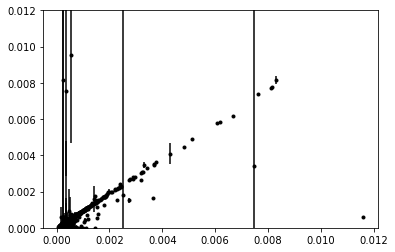

In [50]:
plt.errorbar(x0vals[mlist], x0vals_fitsn, yerr = x0val_err, fmt="k.")
plt.ylim(0,0.012)